# Parasite Chain Building

Here I'm going to try and build a parasite chain attack, with only a specific transaction for this first version. A more comprehensive version with adaptability can be developed later.

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

from tangle import Tangle, node_graph, watcher
from PC_classes import mal_node

plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

In [2]:
t = Tangle(rate=3, tip_selection='mcmc', plot=True)
ng = node_graph(t)
w = watcher(t, ng)
for n in range(4):
    ng.new_node()

First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000027FFFD292E0>]
Edges []
Node IDS [0]
Weights [[0, 421, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000027FFFD292E0>, <tangle.node object at 0x0000027FF06CB470>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 421, 1], [1, 1704, 4]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000027FFFD292E0>, <tangle.node object at 0x0000027FF06CB470>, <tangle.node object at 0x0000027FF06CB5C0>]
Edges [(1, 0), (2, 1), (2, 0)]
Node IDS [0, 1, 2]
Weights [[0, 421, 1], [1, 1704, 4], [2, 706, 2]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000027FFFD292E0>, <tangle.node object at 0x0000027FF06CB470>, <tangle.node object at 0x0000027FF06CB5C0>, <tangle.node object at 0x0000027FF06CB200>]
Edges [(1, 0), (2, 1), (2, 0), (3, 1), (3, 0)]
Node IDS [0, 1, 2, 3]
Weights [[0, 421, 1], [1, 1704, 4], [2, 706, 2], [3, 1443, 4]]


Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000027FFFD292E0>, <tangle.node object at 0x0000027FF06CB470>, <tangle.node object at 0x0000027FF06CB5C0>, <tangle.node object at 0x0000027FF06CB200>, <tangle.mal_node object at 0x0000027FFFB7B650>]
Edges [(1, 0), (2, 1), (2, 0), (3, 1), (3, 0), (4, 0), (4, 1)]
Node IDS [0, 1, 2, 3, 4]
Weights [[0, 421, 1], [1, 1704, 4], [2, 706, 2], [3, 1443, 4], [4, 448, 2]]


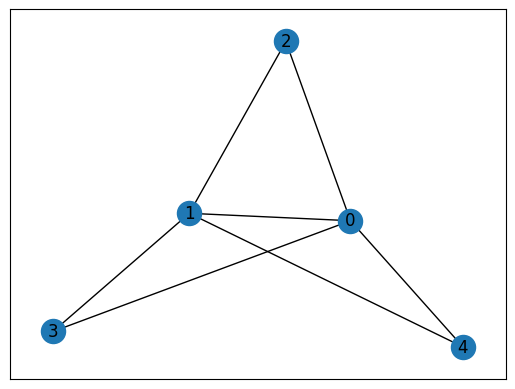

In [3]:
ng.new_node(mal=True)

ng.plot_graph()

### Build up a small graph to add the chain to

In [4]:
for j in range(2):
    for i in range(4):
        ng.nodes[i].issue_transaction()
        w.update()

Tips 0 0
2 Genesis Found
------------
Transaction number 1
Transaction Content 20
Node Weight 1
Confirmed Status False
[<Genesis>, <Transaction 1>]
Tips 1 0
Selected Different Transactions
------------
Transaction number 2
Transaction Content 70
Node Weight 4
Confirmed Status False
[<Genesis>, <Transaction 1>, <Transaction 2>]
Tips 2 1
Selected Different Transactions
------------
Transaction number 3
Transaction Content 57
Node Weight 2
Confirmed Status False
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>]
Tips 2 2
Same non-genesis selected
New Tips 2 3
------------
Transaction number 4
Transaction Content 7
Node Weight 4
Confirmed Status False
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>, <Transaction 4>]
Tips 4 4
Same non-genesis selected
New Tips 4 3
------------
Transaction number 5
Transaction Content 24
Node Weight 1
Confirmed Status False
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>, <Transaction 4>, <Transaction 5>]
Tips 4 3
Sele

Add the bad transaction

In [5]:
ng.nodes[-1].issue_bad_transaction()
w.update()
ng.nodes[-1].spam_transactions(5)
w.update()

Tips 4 4
Same non-genesis selected
New Tips 4 6
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>, <Transaction 4>, <Transaction 5>, <Transaction 6>, <Transaction 7>, <Transaction 8>, <Transaction 9>]
Tips 4
approved <Transaction 9>
approved <Transaction 4>
Tips 6
approved <Transaction 10>
approved <Transaction 6>
Tips 8
approved <Transaction 11>
approved <Transaction 8>
Tips 10
approved <Transaction 12>
approved <Transaction 10>
Tips 13
approved <Transaction 13>
approved <Transaction 13>
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>, <Transaction 4>, <Transaction 5>, <Transaction 6>, <Transaction 7>, <Transaction 8>, <Transaction 9>, <Transaction 10>, <Transaction 11>, <Transaction 12>, <Transaction 13>, <Transaction 14>]


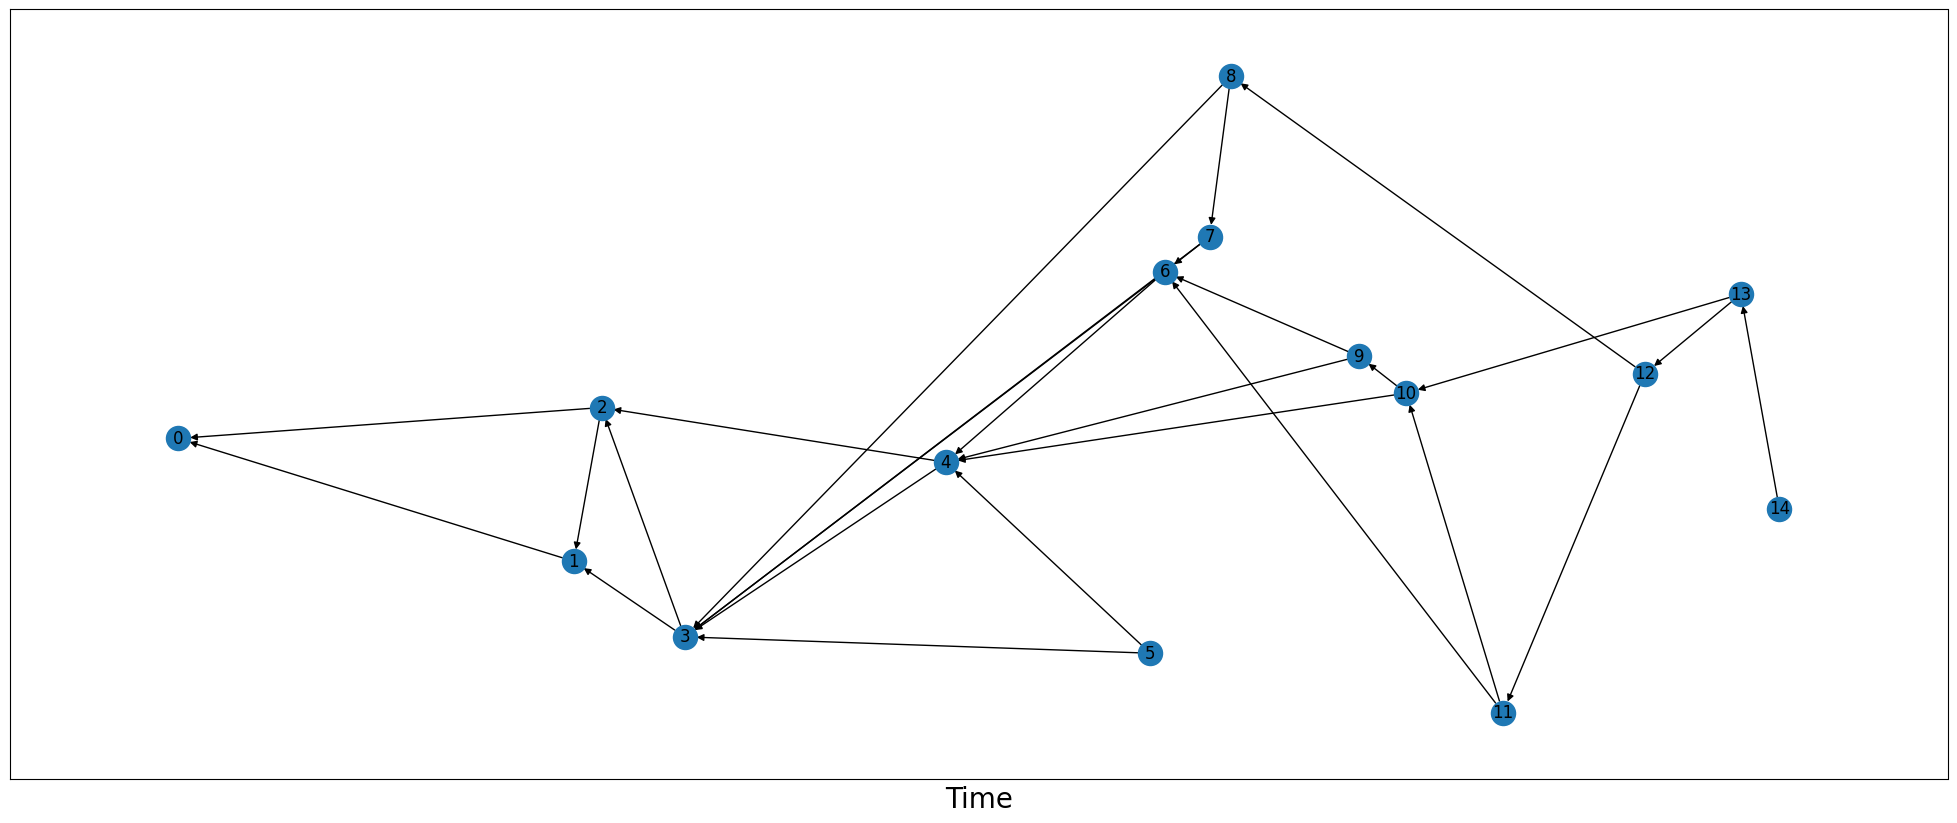

In [6]:
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.figure(figsize=(25, 10))
t.plot()